## inear Regression with PyTorch

* **Dataset and Noise**

  * Data consists of pairs $(x, y)$.
  * Even if the relationship is linear, there is always some noise (assumed Gaussian).

* **Loss and Cost Function**

  * *Loss* = error for a single sample: $(\hat{y} - y)^2$.
  * *Cost* = sum or average of losses across all samples (MSE).
  * Goal: find parameters (slope and bias) that minimize the cost.

* **Gradient Descent**

  * Iterative method to update parameters:

    $$
    w_{new} = w_{old} - \eta \cdot \frac{\partial L}{\partial w}, \quad
    b_{new} = b_{old} - \eta \cdot \frac{\partial L}{\partial b}
    $$
  * If $\eta$ (learning rate) is too high → overshooting.
  * If $\eta$ is too low → very slow convergence.
  * Can stop training with *early stopping* when the loss no longer improves.

* **Cost Surface and Contour Plot**

  * The cost function with two parameters (w and b) is a 3D surface.
  * Gradient points to the direction of steepest ascent → gradient descent moves in the opposite direction toward the minimum.

* **Implementation in PyTorch**

  * Define tensors for parameters with `requires_grad=True`.
  * Build the forward function (linear model) and the cost function (MSE).
  * Compute gradients with `loss.backward()`.
  * Update manually: `w.data -= η * w.grad`.
  * Reset gradients each iteration with `w.grad.zero_()`.

* **Best Practices**

  * **Learning rate**: start with moderate values (e.g. 0.01); consider schedulers.
  * **Standardize data**: input features should have mean 0 and variance 1 → faster and more stable training.
  * **Validation set**: monitor overfitting, use early stopping.
  * **Gradient clipping**: prevents exploding gradients.
  * **Loss monitoring**: plot training/validation loss or use TensorBoard.




## **Linear Regression with Gradient Descent in PyTorch**

Goal : Learn **slope (w)** and **bias (b)** for the line:

$$ y = 3x + 2 + noise$$

using **manual gradient descent** in PyTorch.

In [7]:
import torch
import matplotlib.pyplot as plt

In [8]:
# Generate synthetic data: y = 3x + 2 + noise
X = torch.linspace(-5, 5, 50).view(-1, 1) # input data
y = 3 * X + 2 + torch.randn(X.size()) * 2 # target with noise

In [9]:
# Initialize slope (w) and bias (b) with random values
w = torch.randn(1, requires_grad=True)
b = torch.randn(1, requires_grad=True)

learning_rate = 0.01
epochs = 50
losses = []

In [10]:
# Training loop (manual gradient descent)
for epoch in range(epochs):
    # Forward pass: predict y
    y_pred = w * X + b

    # Compute Mean Squared Error (MSE)
    loss = torch.mean((y_pred - y) ** 2)
    losses.append(loss.item())

    # Backward pass: compute gradients
    loss.backward()

    # Update parameters manually
    with torch.no_grad():
        w -= learning_rate * w.grad
        b -= learning_rate * b.grad

    # Reset gradients
    w.grad.zero_()
    b.grad.zero_()

    # Print progress
    if epoch % 10 == 0:
        print(f"Epoch {epoch}: Loss = {loss.item():.4f}, w = {w.item():.3f}, b = {b.item():.3f}")


Epoch 0: Loss = 187.9853, w = -0.595, b = -1.628
Epoch 10: Loss = 17.9268, w = 2.504, b = -0.899
Epoch 20: Loss = 10.6153, w = 2.965, b = -0.304
Epoch 30: Loss = 8.0858, w = 3.034, b = 0.183
Epoch 40: Loss = 6.4491, w = 3.044, b = 0.581


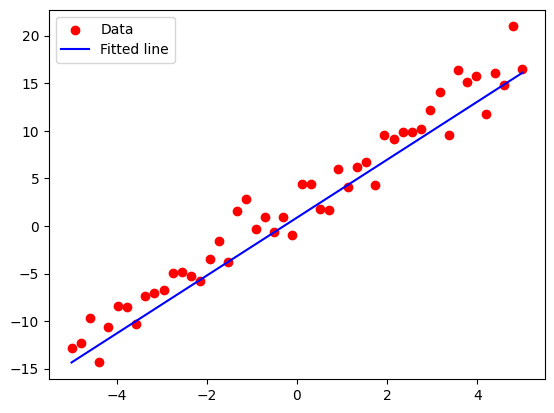

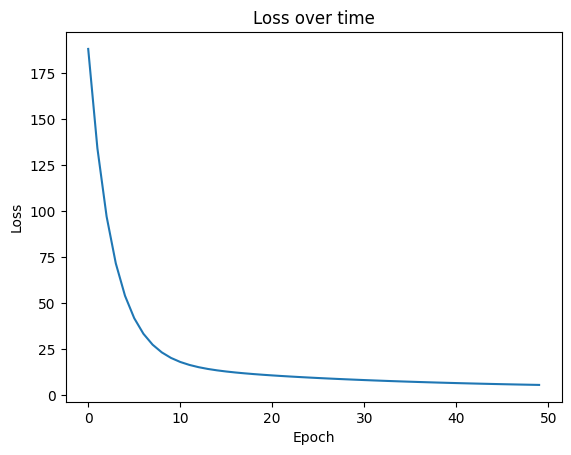

In [11]:
# Plot data and fitted line
plt.scatter(X.numpy(), y.numpy(), color="red", label="Data")
plt.plot(X.numpy(), (w.item() * X + b.item()).detach().numpy(), color="blue", label="Fitted line")
plt.legend()
plt.show()

# Plot loss over epochs
plt.plot(losses)
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Loss over time")
plt.show()


### Understanding the Training Process

**Red dots**: Your training data points, which are pairs of `(x, y)` values. They approximately follow a straight line but with some added **noise** (random variation).

**Blue line**: The straight line that the model has **learned** after training. Its position and slope are determined by the current **w** (weight) and **b** (bias) parameters.

At the beginning (**epoch 0**), this line is far from the data points. As the **training loop** progresses, the values of **w** and **b** are adjusted, and the line gets closer to the actual data.

By the end of training, the blue line should pass "through the middle" of the red dots, effectively approximating the overall trend of the data.

### The Training Loss Plot

* **X-axis**: Epochs (training iterations).
* **Y-axis**: The value of the **loss** (Mean Squared Error).

The curve should **decrease over time**, which means the model is improving with each epoch by reducing its error.

Initially, the loss is high because the estimated line is far from the data points. It then drops rapidly in the first few epochs. Towards the end of the training, the curve slows down and tends to **stabilize**, indicating that the model has almost reached the minimum possible loss for that dataset.

**In the first graph**, you see the **geometric result**: the line learning to adapt to the data points.

**In the second**, you see the **numerical result**: the error decreasing over time, thanks to **gradient descent**.

## Loss, Weights, and Bias in Machine Learning

**Loss**

Yes, this is the measure of how much the model is getting wrong. It must decrease during training; otherwise, it means the parameters are not moving in the right direction.

---

**Weight (w) and Bias (b)**

* **Weight (w):** Correct, this is the slope of the line. It determines how **y** changes as **x** changes. If **w** = 3, it means for every increase of 1 in **x**, **y** increases by 3 (plus the contribution from the bias).
* **Bias (b):** It's not a "random" error, but a model parameter representing the **vertical shift of the line**. Its purpose is to ensure the line doesn't have to pass through the origin (0,0). Think of it as a "system corrector" that adds a constant offset to the prediction.

---

## Training

By changing **w** and **b**, the model searches for the right combination that reduces the loss. When the loss is at its minimum, it means that **w** and **b** are the best possible approximation of the linear relationship in the data.



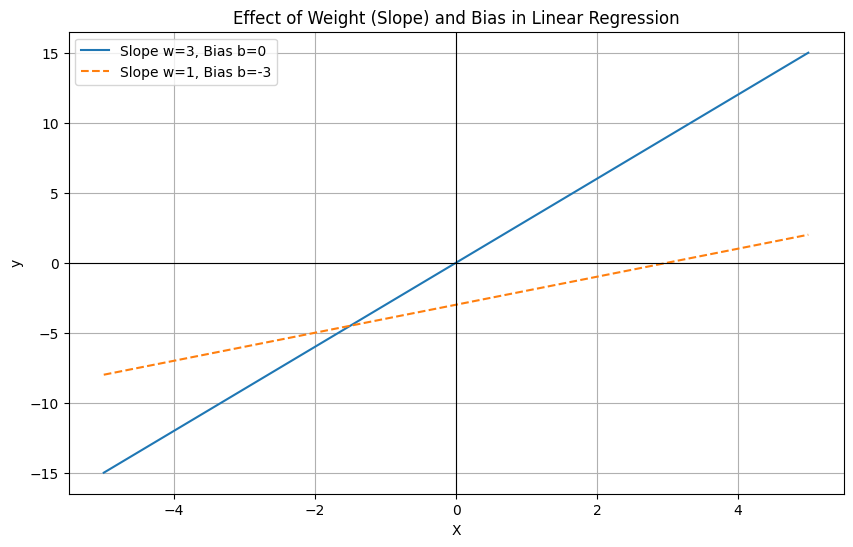

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Generate X values
X = np.linspace(-5, 5, 100)

# Define different weights (slopes) and biases
slopes = [0.5, 1, 3]
biases = [0, 2, -3]

plt.figure(figsize=(10, 6))

# Plot effect of slope (different weights)
for w in slopes:
    y = w * X
    plt.plot(X, y, label=f"Slope w={w}, Bias b=0")

# Plot effect of bias (different biases with fixed slope)
for b in biases:
    y = 1 * X + b  # slope=1 fixed
    plt.plot(X, y, linestyle="--", label=f"Slope w=1, Bias b={b}")

plt.axhline(0, color="black", linewidth=0.8)
plt.axvline(0, color="black", linewidth=0.8)
plt.legend()
plt.title("Effect of Weight (Slope) and Bias in Linear Regression")
plt.xlabel("X")
plt.ylabel("y")
plt.grid(True)
plt.show()
